In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from skimage import io
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
data = pd.read_csv("summary.csv")
data

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [6]:
data.isnull().sum()


Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

In [8]:
data=data.dropna(axis=0)
data=data.drop(["Name"],axis=1)
X=data.drop(["Target"],axis=1)
Xsorted=np.sort(X)
dataframe=pd.DataFrame(Xsorted)
dataframe
a=np.median(dataframe)
X.fillna({"3PointPercent":a},inplace=True)
X.isnull().sum()

GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
3PointMade           0
3PointAttempt        0
3PointPercent        0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
dtype: int64

In [10]:
y = data["Target"]
y

0       0
1       0
2       0
3       1
4       1
       ..
1335    0
1336    1
1337    0
1338    1
1339    1
Name: Target, Length: 1329, dtype: int64

In [12]:
X.corr()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
GamesPlayed,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693
MinutesPlayed,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PointsPerGame,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FieldGoalsMade,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FieldGoalsAttempt,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FieldGoalPercent,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3PointMade,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PointAttempt,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3PointPercent,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FreeThrowMade,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762


In [14]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()

In [16]:
x_scaled=scaler.fit_transform(X)
x_scaled

array([[0.35211268, 0.64285714, 0.24363636, ..., 0.16      , 0.1025641 ,
        0.27906977],
       [0.33802817, 0.62962963, 0.23636364, ..., 0.44      , 0.12820513,
        0.34883721],
       [0.88732394, 0.32275132, 0.16363636, ..., 0.2       , 0.07692308,
        0.20930233],
       ...,
       [0.45070423, 0.23809524, 0.17090909, ..., 0.12      , 0.1025641 ,
        0.18604651],
       [0.57746479, 0.23544974, 0.13818182, ..., 0.16      , 0.02564103,
        0.1627907 ],
       [0.50704225, 0.22751323, 0.13454545, ..., 0.28      , 0.02564103,
        0.18604651]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [20]:
max1=0
max2=0
bestK=0
bestD=0
LIST1=[]
LIST2=[]
y_pred1=[]
y_pred2=[]

for i in range(1,100):
    model1=KNeighborsClassifier(n_neighbors=i)
    model2=DecisionTreeClassifier(max_depth=i)
    model1.fit(X_train ,y_train)
    model2.fit(X_train ,y_train)
    y1_pred=model1.predict(X_test)
    y2_pred=model2.predict(X_test)
    acknn=accuracy_score(y_test, y1_pred)*100
    acd=accuracy_score(y_test, y2_pred)*100

    if(acknn>max1):
        max1=acknn
        bestK=i
    if(acd>max2):
        max2= acd
        bestD=i
    LIST1.append(acknn)
    y_pred1.append(y1_pred)
    LIST2.append(acd)
    y_pred2.append(y2_pred)
 

In [22]:
max1

75.93984962406014

In [24]:
bestK

12

In [26]:
bestD

3

In [28]:
max2

71.42857142857143

max2

In [31]:
model1=KNeighborsClassifier(n_neighbors=23)
model1.fit(X_train ,y_train)
y1_pred=model1.predict(X_test)
confusion_matrix=confusion_matrix(y_test, y1_pred)

In [33]:
confusion_matrix

array([[ 56,  34],
       [ 36, 140]], dtype=int64)

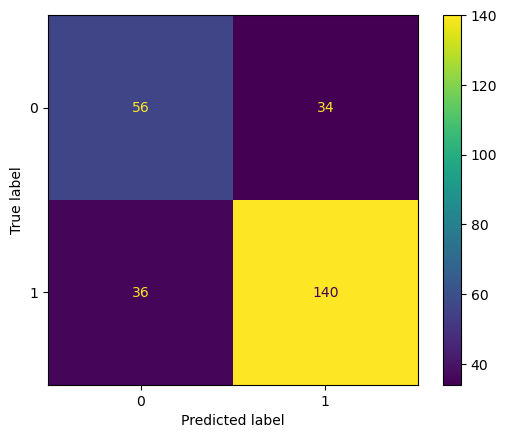

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [37]:
precision = precision_score(y_test, y1_pred)
recall = recall_score(y_test, y1_pred)
print("precision =",precision)

print("recall =",recall)




precision = 0.8045977011494253
recall = 0.7954545454545454


In [67]:
model2=DecisionTreeClassifier(max_depth=3)

In [69]:
adaboost = AdaBoostClassifier(estimator=model2, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)*100
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
print("precision =",precision)

print("recall =",recall)


precision = 0.8012422360248447
recall = 0.7329545454545454


In [71]:
accuracy_adaboost

70.30075187969925

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)
y_oob_pred=oob_model.predict(X_test)
ac_oob=accuracy_score(y_test, y_oob_pred)*100
ac_oob


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


64.56456456456456

In [628]:
precision = precision_score(y_test, y_oob_pred)
recall = recall_score(y_test, y_oob_pred)
print("precision =",precision)

print("recall =",recall)

precision = 0.6933962264150944
recall = 0.735
